### Using data from SEADE to generate graphics with deaths per city of São Paulo

This program will download official information from the estate of São Paulo to plot graphics of deaths per target city.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Download dos dados mais atuais
loadCOVID19SP = 'https://github.com/seade-R/dados-covid-sp/raw/master/data/dados_covid_sp.csv'
## Caso esteja sem conexão, pode utilizar os últimos dados disponíveis:
#loadCOVID19SP.to_csv('/dados_covid_sp.csv')

DataCOVID19SP = pd.read_csv(loadCOVID19SP,
                      delimiter=';', 
                      encoding='utf-8',
                      decimal=',',
                      parse_dates=['datahora'])

#Salvando um backup
DataCOVID19SP.to_csv ('dados_covid_sp.csv', header=True)
DataCOVID19SP = DataCOVID19SP[['nome_munic','datahora','obitos_mm7d','obitos_pc']]
DataCOVID19SP.to_csv ('dados_covid_sp_simples.csv', header=True)

DataCOVID19SP['datahora'].tail(1)
#You can see on the datahora bellow what is the last update date.

126615   2020-09-07
Name: datahora, dtype: datetime64[ns]

Text(0.5, 1.0, 'Óbitos de São Paulo - Média Móvel de 7 dias')

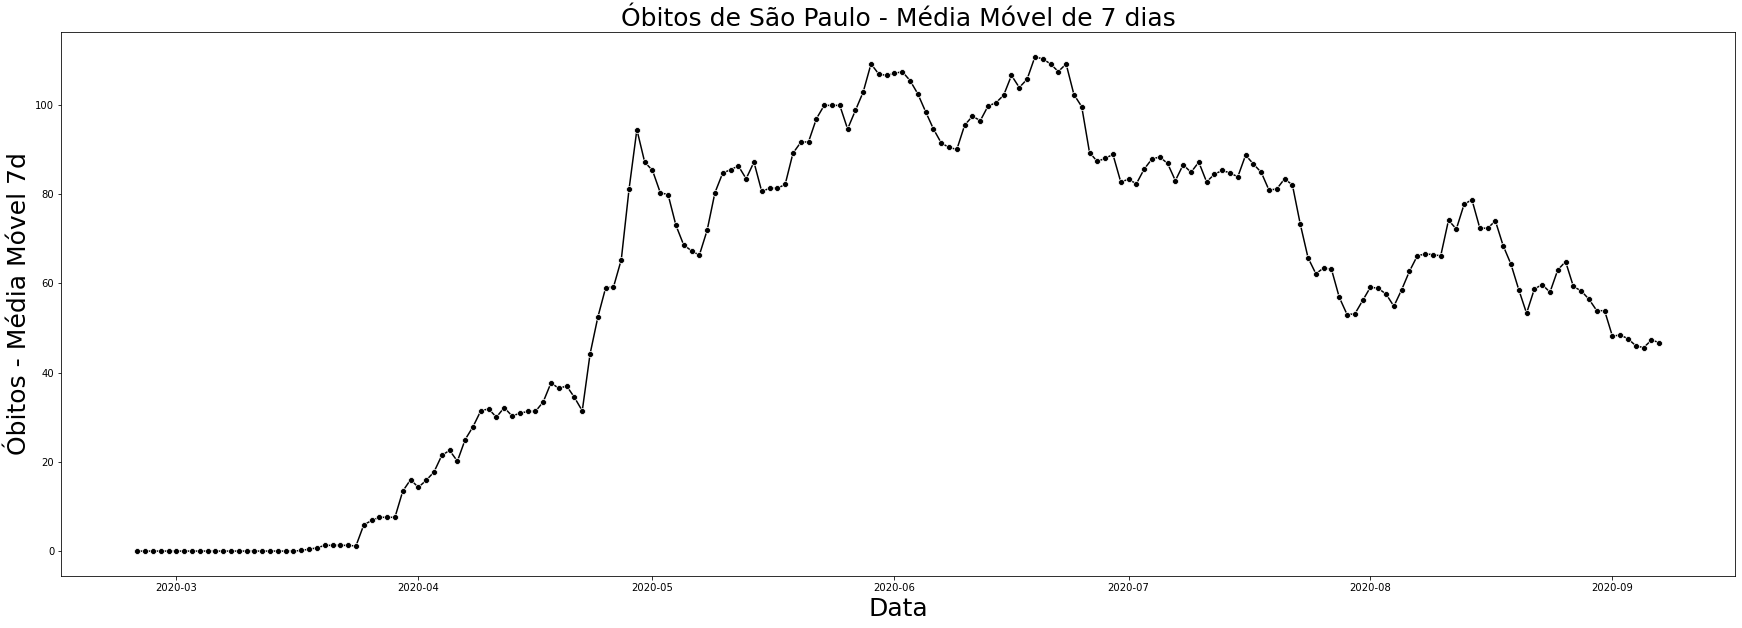

In [2]:
#Gráfico simples com óbitos somente para uma cidade.
obitos_mm7d_SaoPaulo = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

plt.figure(figsize=(30,10))
sns.lineplot(x='datahora',y='obitos_mm7d', color="black", marker='o', data=obitos_mm7d_SaoPaulo)

plt.xlabel('Data', size = 25)
plt.ylabel('Óbitos - Média Móvel 7d', size = 25)
plt.title('Óbitos de São Paulo - Média Móvel de 7 dias', size = 25)


Text(0.5, 1.0, 'Óbitos de São Paulo por 100K Habitantes')

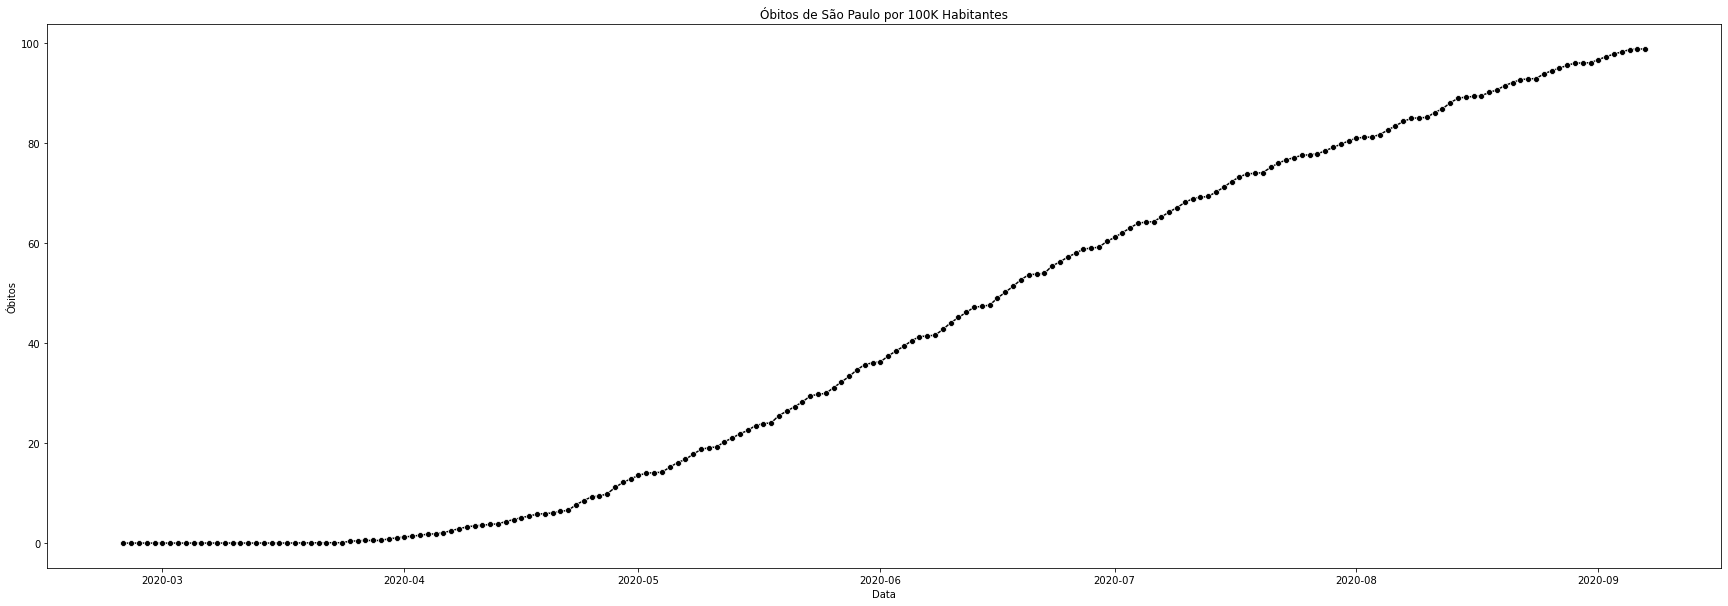

In [3]:
#Gráfico simples com óbitos/100K somente para uma cidade.
obitos_100K_SaoPaulo = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

plt.figure(figsize=(30,10))
sns.lineplot(x='datahora',y='obitos_pc', color="black", marker='o', data=obitos_100K_SaoPaulo)

plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.title('Óbitos de São Paulo por 100K Habitantes')

In [20]:
#Preparando o dataframe somente com cidades específicas.
#Só consegui partindo de uma como ponto de partida e adicionando outras posteriormente no for com o append.

obitos_mm7d_Selection = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

for n in DataCOVID19SP['nome_munic']:
        if n in ('Guarulhos', 'Bauru', 'Itanhaém', 'Santos', 'Santo André', 'São Bernardo do Campo', 'Campinas', 'Osasco', 'Barueri', 'Itapevi'):
            a = DataCOVID19SP[DataCOVID19SP['nome_munic'] == n]
            obitos_mm7d_Selection=obitos_mm7d_Selection.append(a)

            
#Doing the same for deaths each 100K inhab.
obitos_100K_Selection = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

for n in DataCOVID19SP['nome_munic']:
        if n in ('Guarulhos', 'Bauru', 'Itanhaém', 'Santos', 'Santo André', 'São Bernardo do Campo', 'Campinas', 'Osasco', 'Barueri', 'Itapevi'):
            a = DataCOVID19SP[DataCOVID19SP['nome_munic'] == n]
            obitos_100K_Selection=obitos_100K_Selection.append(a)

obitos_mm7d_Selection.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 384356 entries, 562 to 126319
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   nome_munic   384356 non-null  object        
 1   datahora     384356 non-null  datetime64[ns]
 2   obitos_mm7d  384356 non-null  float64       
 3   obitos_pc    384356 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 13.2+ MB


Text(0.5, 1.0, 'Óbitos - Média Móvel de 7 dias')

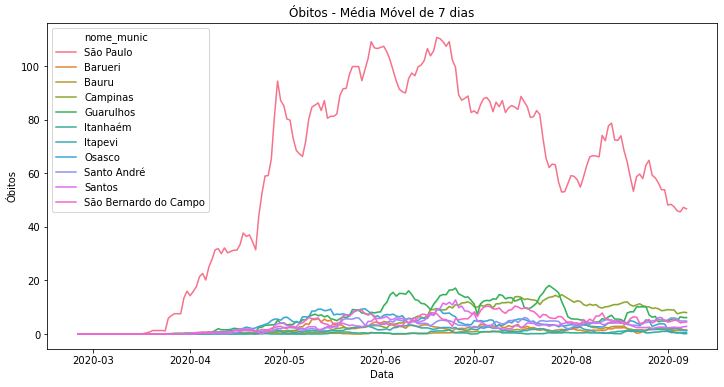

In [21]:
#Gerando o gráfico

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = "datahora", y = "obitos_mm7d", data = obitos_mm7d_Selection, hue='nome_munic')

plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.title('Óbitos - Média Móvel de 7 dias')

Text(0.5, 1.0, 'Óbitos por 100K Habitantes')

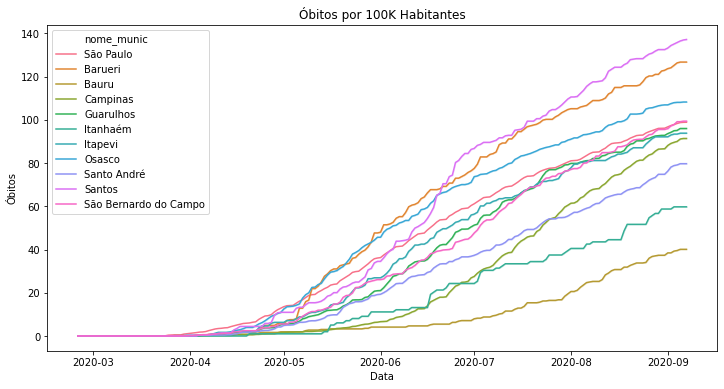

In [22]:
#Gerando o gráfico para mortes a cada 100K

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = "datahora", y = "obitos_pc", data = obitos_100K_Selection, hue='nome_munic')

plt.xlabel('Data')
plt.ylabel('Óbitos')
plt.title('Óbitos por 100K Habitantes')

      nome_munic   datahora  obitos_mm7d  obitos_pc
81812     Santos 2020-06-30     7.714286  86.306840
81812     Santos 2020-06-30     7.714286  86.306840
81812     Santos 2020-06-30     7.714286  86.306840
81812     Santos 2020-06-30     7.714286  86.306840
81812     Santos 2020-06-30     7.714286  86.306840
...          ...        ...          ...        ...
81337      Bauru 2020-06-30     0.857143   7.138445
81337      Bauru 2020-06-30     0.857143   7.138445
81337      Bauru 2020-06-30     0.857143   7.138445
81337      Bauru 2020-06-30     0.857143   7.138445
81337      Bauru 2020-06-30     0.857143   7.138445

[1961 rows x 4 columns]


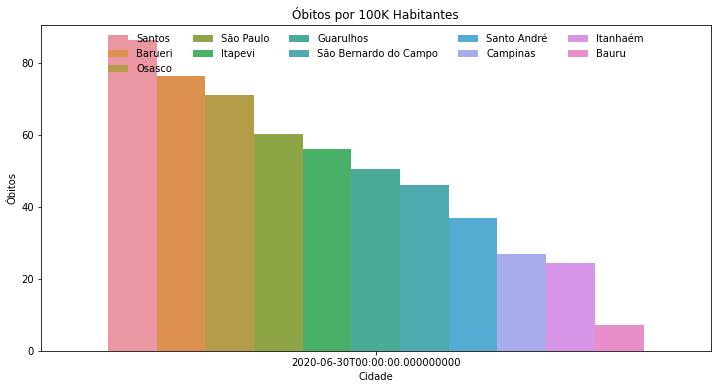

In [23]:
#Gerando o gráfico para mortes a cada 100K

last_obitos_100K_Selection = obitos_100K_Selection[obitos_100K_Selection['datahora'] == '2020-06-30']
last_obitos_100K_Selection = last_obitos_100K_Selection.sort_values('obitos_pc', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "datahora", y = "obitos_pc", data = last_obitos_100K_Selection, hue='nome_munic')

plt.xlabel('Cidade')
plt.ylabel('Óbitos')
plt.title('Óbitos por 100K Habitantes')
ax.legend(frameon=False, loc='upper center', ncol=5)

print(last_obitos_100K_Selection)